# FlightDelayPrediction

<B>TASK 2</B>


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\KUNAL\Documents\Widhya_Internship\flights.csv',low_memory='False',nrows=100000)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info

<bound method DataFrame.info of        YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0      2015      1    1            4      AS             98      N407AS   
1      2015      1    1            4      AA           2336      N3KUAA   
2      2015      1    1            4      US            840      N171US   
3      2015      1    1            4      AA            258      N3HYAA   
4      2015      1    1            4      AS            135      N527AS   
...     ...    ...  ...          ...     ...            ...         ...   
99995  2015      1    7            3      EV           4992      N837AS   
99996  2015      1    7            3      NK            394      N522NK   
99997  2015      1    7            3      OO           5606      N582SW   
99998  2015      1    7            3      UA           1135      N38473   
99999  2015      1    7            3      AA             74      N4XLAA   

      ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ... 

In [4]:
data['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

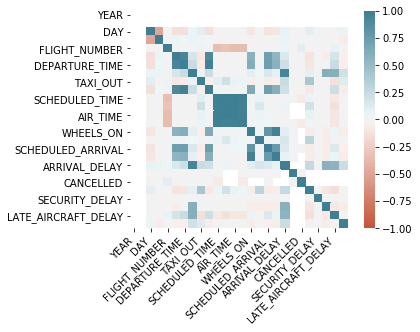

In [4]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
#Checking the relationship btw Hours and Scores
data.corr()['ARRIVAL_DELAY'].sort_values()

DISTANCE              -0.023821
SCHEDULED_TIME        -0.022043
AIR_TIME              -0.002742
SECURITY_DELAY         0.006070
ELAPSED_TIME           0.048448
FLIGHT_NUMBER          0.056163
DAY_OF_WEEK            0.067520
DAY                    0.070770
ARRIVAL_TIME           0.076791
WHEELS_ON              0.088131
SCHEDULED_ARRIVAL      0.140565
SCHEDULED_DEPARTURE    0.154951
TAXI_IN                0.170073
WHEELS_OFF             0.217344
DEPARTURE_TIME         0.223654
WEATHER_DELAY          0.235906
TAXI_OUT               0.245363
AIR_SYSTEM_DELAY       0.259700
LATE_AIRCRAFT_DELAY    0.572956
AIRLINE_DELAY          0.592718
DEPARTURE_DELAY        0.950838
ARRIVAL_DELAY          1.000000
YEAR                        NaN
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

In [5]:
# checking the percentage of missing data contains in all the columns
missing_percentage = data.isnull().sum()/100
print(missing_percentage)

YEAR                     0.00
MONTH                    0.00
DAY                      0.00
DAY_OF_WEEK              0.00
AIRLINE                  0.00
FLIGHT_NUMBER            0.00
TAIL_NUMBER              1.67
ORIGIN_AIRPORT           0.00
DESTINATION_AIRPORT      0.00
SCHEDULED_DEPARTURE      0.00
DEPARTURE_TIME          22.98
DEPARTURE_DELAY         22.98
TAXI_OUT                23.71
WHEELS_OFF              23.71
SCHEDULED_TIME           0.00
ELAPSED_TIME            26.13
AIR_TIME                26.13
DISTANCE                 0.00
WHEELS_ON               24.40
TAXI_IN                 24.40
SCHEDULED_ARRIVAL        0.00
ARRIVAL_TIME            24.40
ARRIVAL_DELAY           26.13
DIVERTED                 0.00
CANCELLED                0.00
CANCELLATION_REASON    976.11
AIR_SYSTEM_DELAY       653.75
SECURITY_DELAY         653.75
AIRLINE_DELAY          653.75
LATE_AIRCRAFT_DELAY    653.75
WEATHER_DELAY          653.75
dtype: float64


In [ ]:
Dropping the Columns with Null values

In [3]:
data.drop(['YEAR'], axis=1, inplace=True)
data.drop(['FLIGHT_NUMBER'], axis=1, inplace=True)
data.drop(['AIRLINE'], axis=1, inplace=True)
data.drop(['DISTANCE'], axis=1, inplace=True)
data.drop(['TAIL_NUMBER'], axis=1, inplace=True)
data.drop(['TAXI_OUT'], axis=1, inplace=True)
data.drop(['SCHEDULED_TIME'], axis=1, inplace=True)
data.drop(['DEPARTURE_TIME'], axis=1, inplace=True)
data.drop(['ELAPSED_TIME'], axis=1, inplace=True)
data.drop(['WHEELS_OFF'], axis=1, inplace=True)
data.drop(['AIR_TIME'], axis=1, inplace=True)
data.drop(['WHEELS_ON'], axis=1, inplace=True)
data.drop(['DAY_OF_WEEK'], axis=1, inplace=True)
data.drop(['TAXI_IN'], axis=1, inplace=True)
data.drop(['ARRIVAL_TIME'], axis=1, inplace=True)
data.drop(['CANCELLATION_REASON'], axis=1, inplace=True)




In [4]:
data.fillna(data['DEPARTURE_DELAY'].mean(),inplace=True)
data.fillna(data['ARRIVAL_DELAY'].mean(),inplace=True)
data.fillna(data['AIR_SYSTEM_DELAY'].mean(),inplace=True)
data.fillna(data['SECURITY_DELAY'].mean(),inplace=True)
data.fillna(data['AIRLINE_DELAY'].mean(),inplace=True)
data.fillna(data['LATE_AIRCRAFT_DELAY'].mean(),inplace=True)
data.fillna(data['WEATHER_DELAY'].mean(),inplace=True)

In [5]:
# checking the percentage of missing data contains in all the columns
missing_percentage = data.isnull().sum()/100
print(missing_percentage)

MONTH                  0.0
DAY                    0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_DELAY        0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_DELAY          0.0
DIVERTED               0.0
CANCELLED              0.0
AIR_SYSTEM_DELAY       0.0
SECURITY_DELAY         0.0
AIRLINE_DELAY          0.0
LATE_AIRCRAFT_DELAY    0.0
WEATHER_DELAY          0.0
dtype: float64


In [8]:
data.mean()

MONTH                     1.000000
DAY                       3.733920
SCHEDULED_DEPARTURE    1306.348280
DEPARTURE_DELAY          19.937749
SCHEDULED_ARRIVAL      1481.115620
ARRIVAL_DELAY            18.342304
DIVERTED                  0.002240
CANCELLED                 0.023890
AIR_SYSTEM_DELAY         14.026801
SECURITY_DELAY            0.070787
AIRLINE_DELAY            17.853921
LATE_AIRCRAFT_DELAY      26.014556
WEATHER_DELAY             2.751971
dtype: float64

In [29]:
data['ARRIVAL_DELAY']<=15


0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: ARRIVAL_DELAY, Length: 100000, dtype: bool

In [33]:
data[data['ARRIVAL_DELAY'] > 15].count()

MONTH                  36221
DAY                    36221
ORIGIN_AIRPORT         36221
DESTINATION_AIRPORT    36221
SCHEDULED_DEPARTURE    36221
DEPARTURE_DELAY        36221
SCHEDULED_ARRIVAL      36221
ARRIVAL_DELAY          36221
DIVERTED               36221
CANCELLED              36221
AIR_SYSTEM_DELAY       36221
SECURITY_DELAY         36221
AIRLINE_DELAY          36221
LATE_AIRCRAFT_DELAY    36221
WEATHER_DELAY          36221
dtype: int64

In [34]:
data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,ATL,BQK,1108,-6.0,1219,-11.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
99996,1,7,LAS,PHL,1108,9.0,1842,2.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
99997,1,7,SFO,BFL,1108,-7.0,1225,7.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749
99998,1,7,ORD,MCO,1109,7.0,1454,-1.0,0,0,19.937749,19.937749,19.937749,19.937749,19.937749


In [6]:
result=[]
for row in data['ARRIVAL_DELAY']:
    if row>15:
        result.append(1)
    else:
        result.append(0)

In [7]:
data['result']=result

In [8]:
x=data.iloc[:,[0,1,4,5,6,8,9,10,11,12,13,14]]
y=data['result']

In [9]:
# Splitting the dataset into Training and Testing Dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

In [10]:
# Scaling the independant variables by Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
# Fitting Decision tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_features=2,max_depth=10,random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
x_train=pd.DataFrame(x_train)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.696273,1.240474,0.706988,1.132103,-0.048902,-0.155805,-0.654237,-1.373552,-0.635845,1.053889,-1.069656
1,0.0,0.145797,1.323352,-0.330754,1.122098,-0.048902,-0.155805,0.141560,0.725432,0.028370,-0.085640,0.455129
2,0.0,-0.955153,1.068502,0.132918,1.664351,-0.048902,-0.155805,-1.187535,-1.373552,-0.126049,-0.867399,-1.069656
3,0.0,0.145797,-0.013060,0.044599,0.271701,-0.048902,-0.155805,-1.187535,-1.373552,-0.753491,-0.788979,0.077503
4,0.0,0.696273,-1.028319,-0.286595,-1.098938,-0.048902,-0.155805,0.141560,0.725432,0.028370,-0.085640,0.455129
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,-1.505629,0.007660,-0.419073,-0.308569,-0.048902,-0.155805,0.141560,0.725432,0.028370,-0.085640,0.455129
69996,0.0,0.145797,0.214855,-0.065799,0.111627,-0.048902,-0.155805,0.141560,0.725432,0.028370,-0.085640,0.455129
69997,0.0,0.696273,1.290201,-0.595710,1.114094,-0.048902,-0.155805,0.141560,0.725432,0.028370,-0.085640,0.455129
69998,0.0,-1.505629,-1.256234,6.800967,-0.958872,-0.048902,-0.155805,-1.187535,-1.373552,-0.753491,11.130850,-1.069656


In [ ]:
from sklearn.tree import DecisionTreeClassifier
roc_values = []
for feature in x_train.columns:
    clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,random_state=42)
    clf.fit(x_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(x_test[feature].to_frame())
    y_scored =np.array(y_scored[:][1])
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))


result: ROC AUC=0.500
Logistic: ROC AUC=0.998


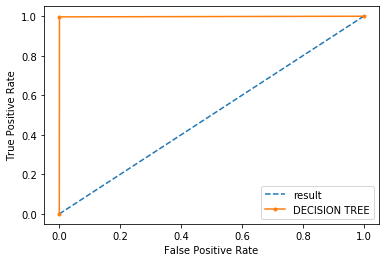

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('result: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='result')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DECISION TREE')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()